# Univariate Linear Regression
## Machine Learning Excercise 1a

### **Install Packages**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cd /Users/antngo/Desktop/AndrewNg/Andrew-Ng-Machine-Learning/wk1

/Users/antngo/Desktop/AndrewNg/Andrew-Ng-Machine-Learning/wk1


### **Data Exploration**

In [3]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### **Data Preprocessing**

In [7]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [8]:
# Convert to matrix
X = np.matrix(X.values)
X = np.insert(X,0,values=1,axis=1)
y = np.matrix(y.values)
theta = np.array([[0],[0]])

### **Data Visualiation**

(5, 25)

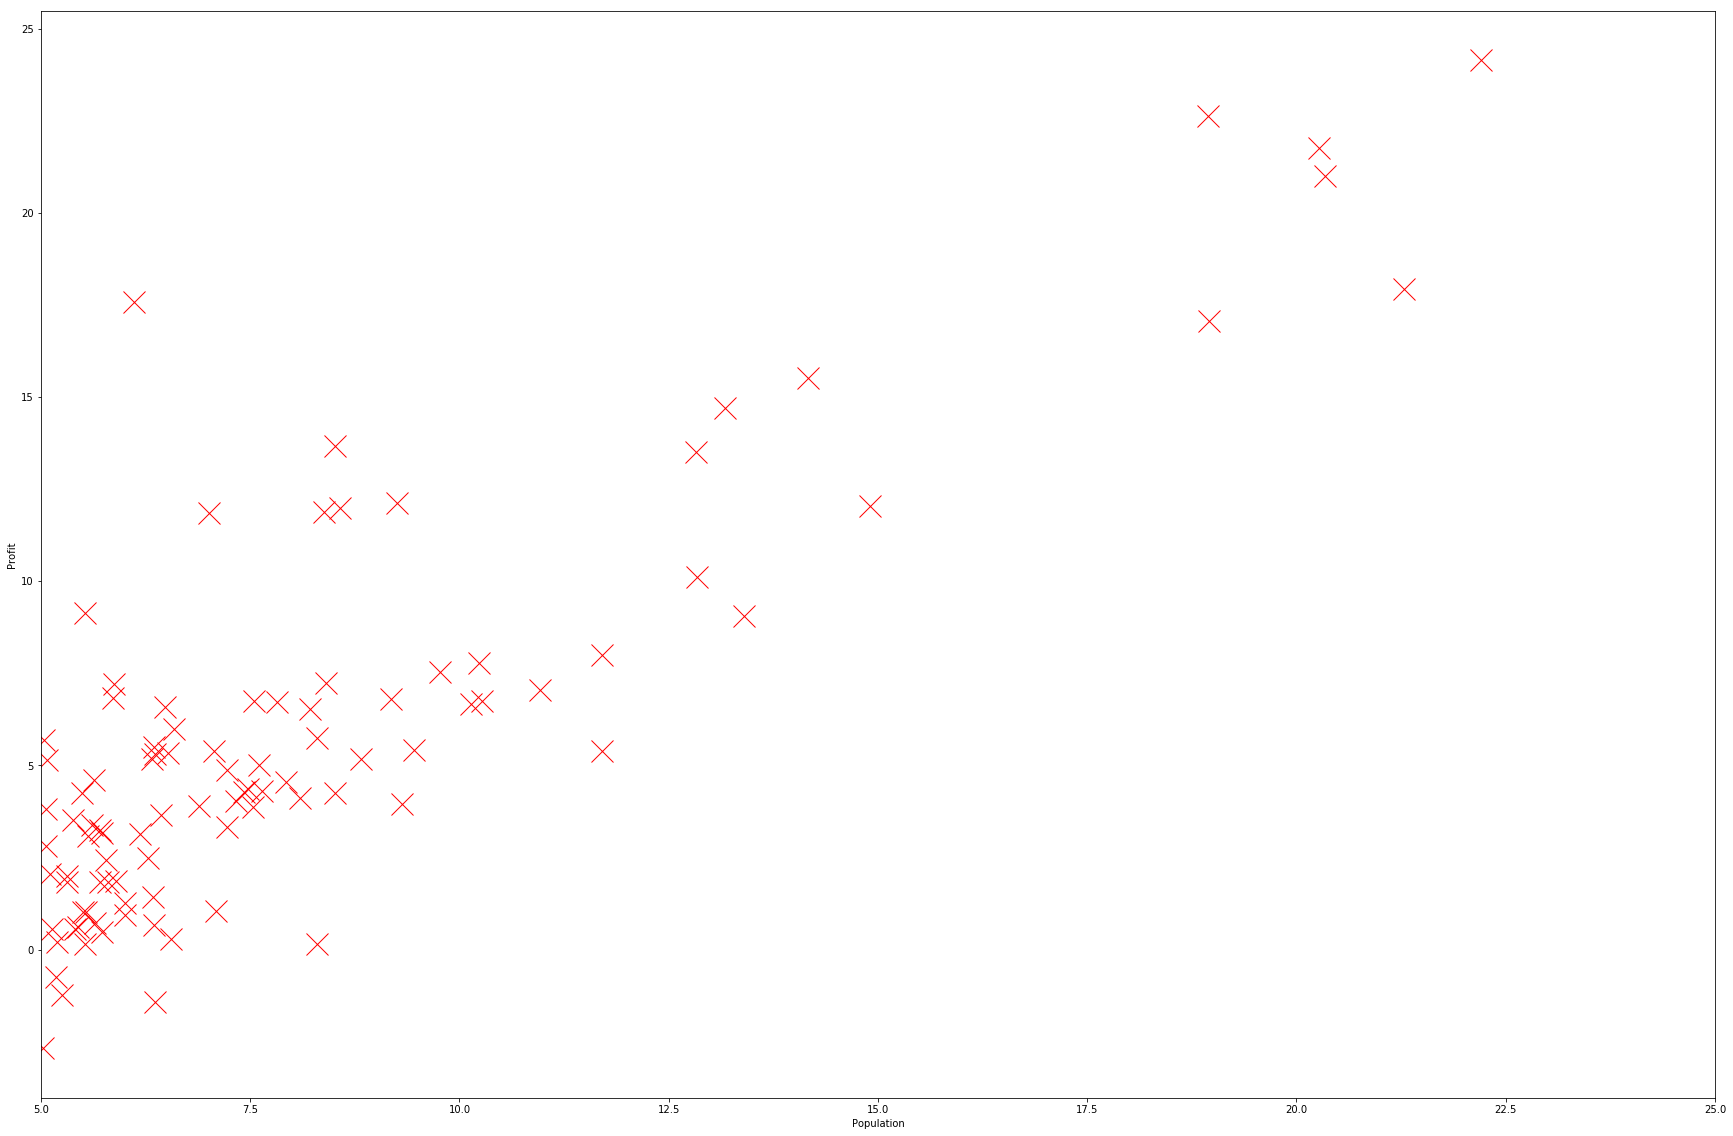

In [9]:
plt.figure(figsize=(30,20))
plt.plot(X,y,'rx', markersize = 22)
plt.ylabel('Profit')
plt.xlabel('Population')
plt.xlim(5,25)

### **Modeling**

## Cost Function
![img](img/costfunction.png)

In [10]:
def computeCost(X,y,theta):
    m = y.shape[0] #97
    J = (1/(2*m)) * np.sum(np.square(X.dot(theta)-y))
    return J
    #return (np.sum(np.square((X*theta.T)-y)) / (2*m))

In [11]:
computeCost(X,y,theta)

32.072733877455676

## Gradient Descent
![img](img/gradientdescent.png)

In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

In [13]:
theta = np.array([[0],[0]])
alpha = 0.01
num_iters = 1500

In [14]:
g, cost = gradientDescent(X,y,theta,alpha,num_iters)
g

matrix([[-3.63029144],
        [ 1.16636235]])

Text(0.5,1,'Predicted Profit vs. Population Size')

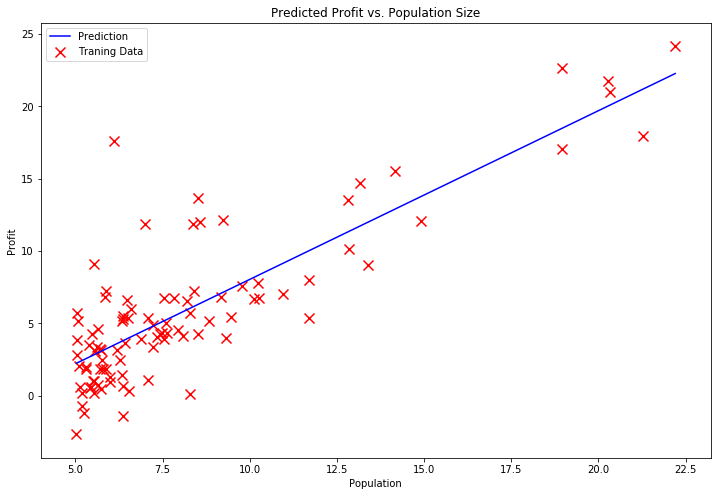

In [15]:
x = np.linspace(data.Population.min(), data.Population.max(),100)

f = g[0,0] + (g[1,0] *x)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,f,'b',label='Prediction')
ax.scatter(data.Population, data.Profit, s=100, c='r', marker = 'x', label='Traning Data',)  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')




Text(0.5,1,'Error vs. Training Epoch')

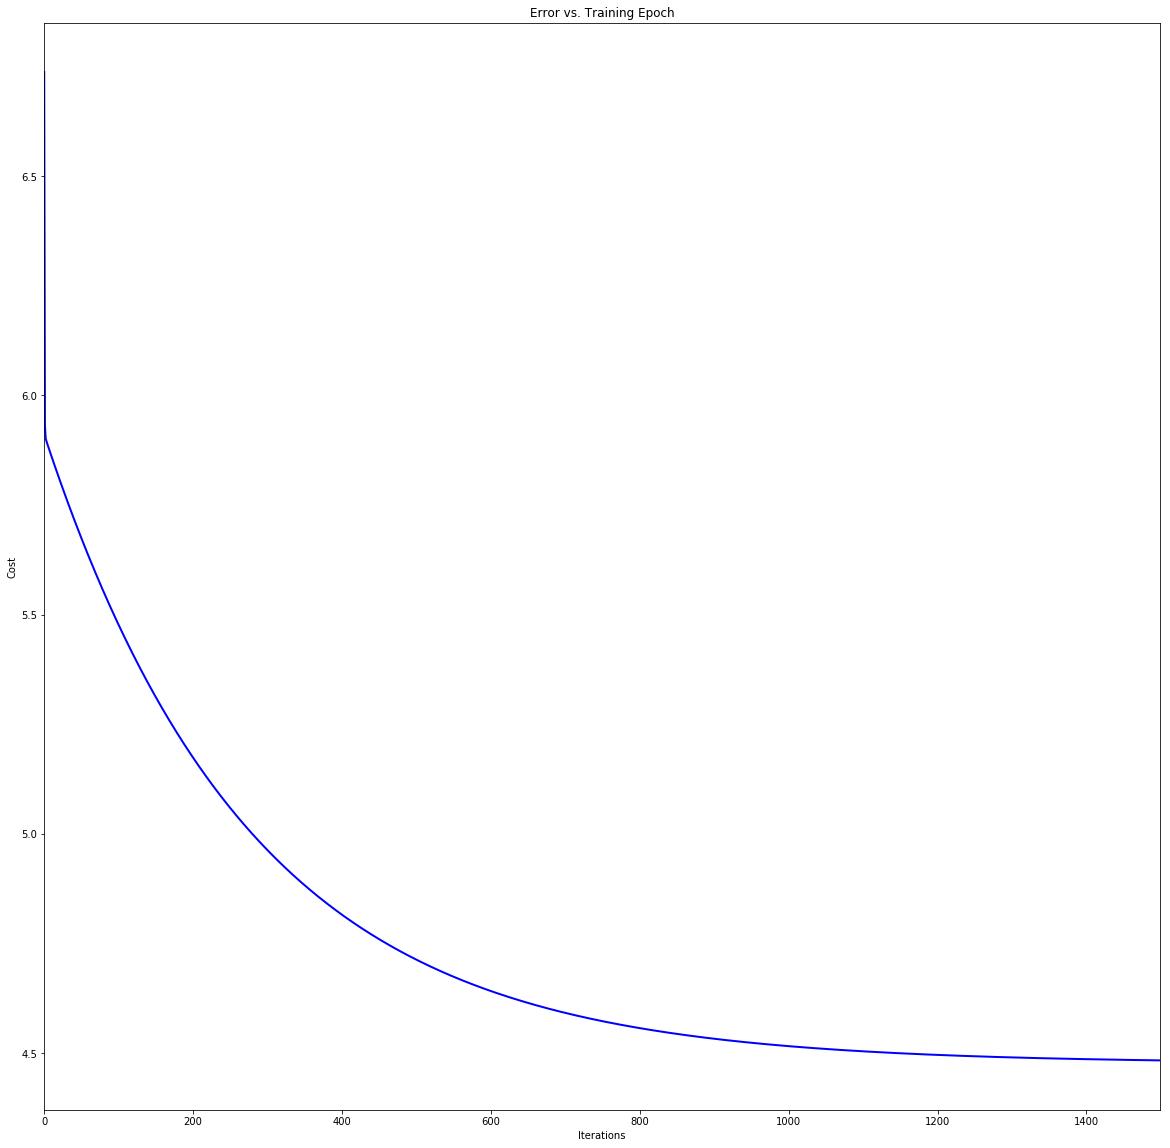

In [16]:
fig, ax = plt.subplots(figsize=(20,20)) 
ax.margins(x=0)
ax.plot(np.arange(num_iters), cost, 'b', linewidth=2)  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 
